## Universidad Autonoma de Aguascalientes
## Carrera: Ingenieria en Computación Inteligente 
## Curso: Aprendizaje Inteligente
## Maestro: Dr. Francisco Javier Luna Rosas
## Alumno: Martin Isai Nunez Villeda
## Semestre: Enero-Junio del 2026

## Practica #5: El perceptron de Frank Rosenblatt para clasificar la Flor de Iris
### En esta practica implementaremos el perceptron de Frank Rosenblatt para clasificar la Flor de Iris. Clasificaremos dos clases de la Flor de Iris (Setosa y Versicolor), las caracteristicas que tomaremos en cuenta son: longitud del petalo y longitud del sefalo.

## Paso 1: Importar las librerias necesarias

In [3]:
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

## Paso 2: Cargamos el dataset

In [4]:
df = pd.read_csv('iris.csv', delimiter=';', decimal=".")
print(df.shape)
print(df.head())

(150, 5)
   s.largo  s.ancho  p.largo  p.ancho    tipo
0      5.1      3.5      1.4      0.2  setosa
1      4.9      3.0      1.4      0.2  setosa
2      4.7      3.2      1.3      0.2  setosa
3      4.6      3.1      1.5      0.2  setosa
4      5.0      3.6      1.4      0.2  setosa


## Paso 3: Extraemos el largo sepal y el largo del petalo en las columnas 0 y 2. Usaremos solo setosa y Versicolor

In [5]:
X = df.iloc[0:100, [0,2]].values
print(X)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

## Paso 4: Graficamos el largo del sepal y el largo del petalo de las flores

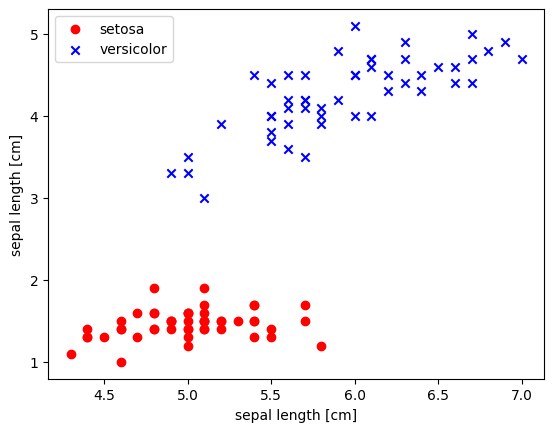

In [6]:
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Paso 4: Seleccionamos setosa y versicolor

In [7]:
Y = df.iloc [0:100, 4].values
print(Y)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

## Paso 5: Convertimos etiquetas numeros

In [8]:
Y = np.where(Y == 'setosa', -1, 1 )
print(Y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


## Paso 6: Creamos un objeto de tipo perceptron

In [9]:
perceptron = Perceptron()

## Paso 7: Entrenamos el percetron para la flor de iris

In [10]:
perceptron.fit(X, Y)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,0


## Paso 8: Predecimos el tipo de flor

In [11]:
perceptron.predict([[5.7, 4.1], [5.1, 1.4]])

array([ 1, -1])

## Conclusiones
### En esta practica utilizamos un algoritmo de aprendizaje automatico (conocido en el idioma ingles como Machine Learning) para clasificar clases que son linealmente separables (el algoritmo percetron). El perceptron clasifica diferentes especies de la flor de iris que son linealmente separables. Las caracteristicas que se tomaron en cuenta son: longitud del petalo y longitud del sefalo

## Referencias
### [1] SCIKIT-LEARN (Machine Learning in Python 2025), URL: http://scikit-learn.org/stable/ (Ultimo acceso, Febrero 2025)
### [2] Codigo Maquina (2025) Perceptrón Paso a Paso con Python: La Base de las Redes Neuronales Artificiales de Machine Learning: https://www.youtube.com/watch?v=dkhXGTersP0 (Ultimo acceso, Febrero 2025)
### [3] Sebastian Raschka, Vahid Mirjalili (2019). Machine Learning, Editorial Marcombo, Madrid, España. URL: https://www.marcombo.com .ISBN: 978-84-267-2720-6
### [4] OpenAI. (2025). ChatGPT (modelo GPT-5.2)[Modelo de lenguaje grande].https://chatgpt.com/